In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Q1. 50_Startups

Question:- Prepare a prediction model for profit of 50_startups data.

In [2]:
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data1=data.rename({'R&D Spend':'Rd_spend','Administration':'Adm','Marketing Spend':'Mk_spend'},axis=1)
data1

,Rd_spend,Adm,Mk_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data1[data1.duplicated()]

,Rd_spend,Adm,Mk_spend,State,Profit


In [5]:
data1.describe()

,Rd_spend,Adm,Mk_spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data1.corr()

,Rd_spend,Adm,Mk_spend,Profit
Rd_spend,1.000000,0.241955,0.724248,0.972900
Adm,0.241955,1.000000,-0.032154,0.200717
Mk_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


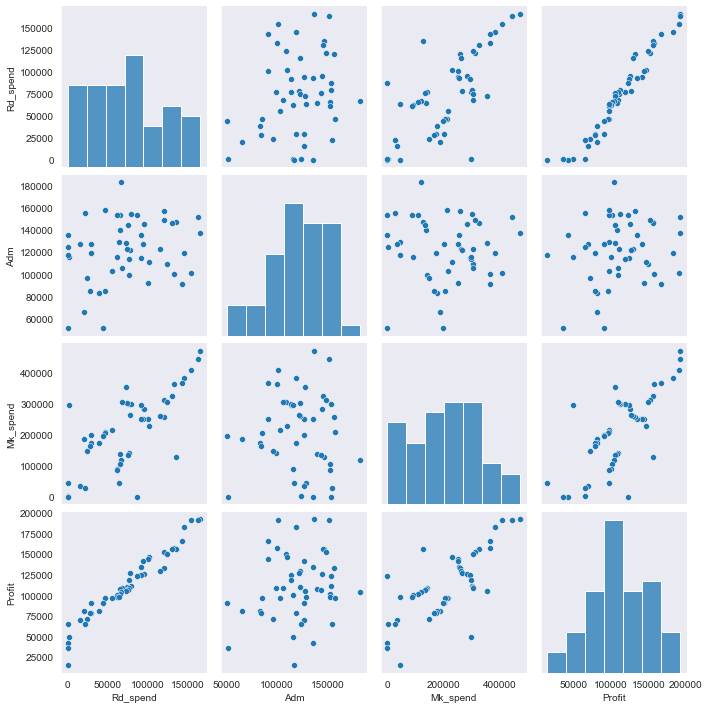

In [11]:
sns.set_style(style='dark')
sns.pairplot(data1)

In [13]:
model=smf.ols("Profit~Rd_spend+Adm+Mk_spend",data=data1).fit()

In [14]:
model.params

Intercept    50122.192990
Rd_spend         0.805715
Adm             -0.026816
Mk_spend         0.027228
dtype: float64

In [15]:
model.tvalues , np.round(model.pvalues,3)

(Intercept     7.626218
 Rd_spend     17.846374
 Adm          -0.525507
 Mk_spend      1.655077
 dtype: float64,
 Intercept    0.000
 Rd_spend     0.000
 Adm          0.602
 Mk_spend     0.105
 dtype: float64)

In [16]:
model.rsquared , model.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

In [17]:
slr_a=smf.ols("Profit~Adm",data=data1).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 Adm          1.419493
 dtype: float64,
 Intercept    0.003824
 Adm          0.162217
 dtype: float64)

In [18]:
slr_m=smf.ols("Profit~Mk_spend",data=data1).fit()
slr_m.tvalues , slr_m.pvalues 

(Intercept    7.808356
 Mk_spend     7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Mk_spend     4.381073e-10
 dtype: float64)

In [19]:
mlr_am=smf.ols("Profit~Adm+Mk_spend",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 Adm          2.467779
 Mk_spend     8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Adm          1.729198e-02
 Mk_spend     9.727245e-11
 dtype: float64)

In [20]:
rsq_r=smf.ols("Rd_spend~Adm+Mk_spend",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

In [21]:
rsq_a=smf.ols("Adm~Rd_spend+Mk_spend",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

In [22]:
rsq_m=smf.ols("Mk_spend~Rd_spend+Adm",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

In [23]:
d1={'Variables':['Rd_spend','Adm','Mk_spend'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Rd_spend,2.468903
1,Adm,1.175091
2,Mk_spend,2.326773


C:\Users\lunia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


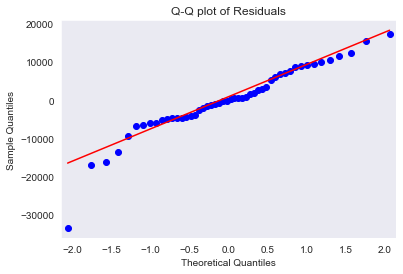

In [24]:
sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot of Residuals")
plt.show()

In [25]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [26]:
def standard_values(vals) : return (vals-vals.mean())/vals.std() 

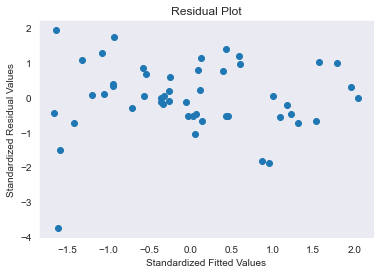

In [27]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show() 

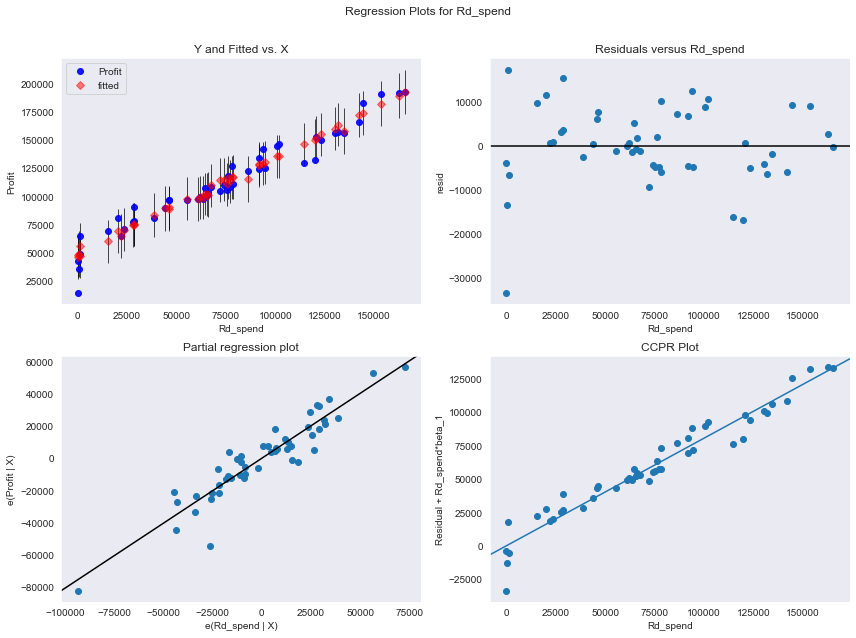

In [36]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'Rd_spend',fig=fig)
plt.show()

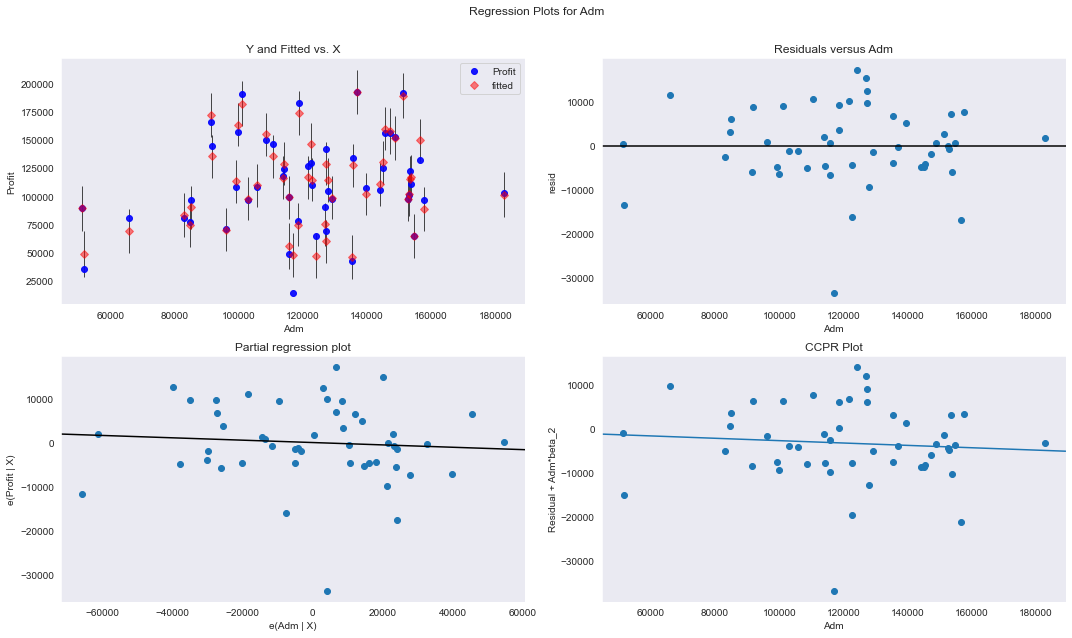

In [32]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'Adm',fig=fig)
plt.show()

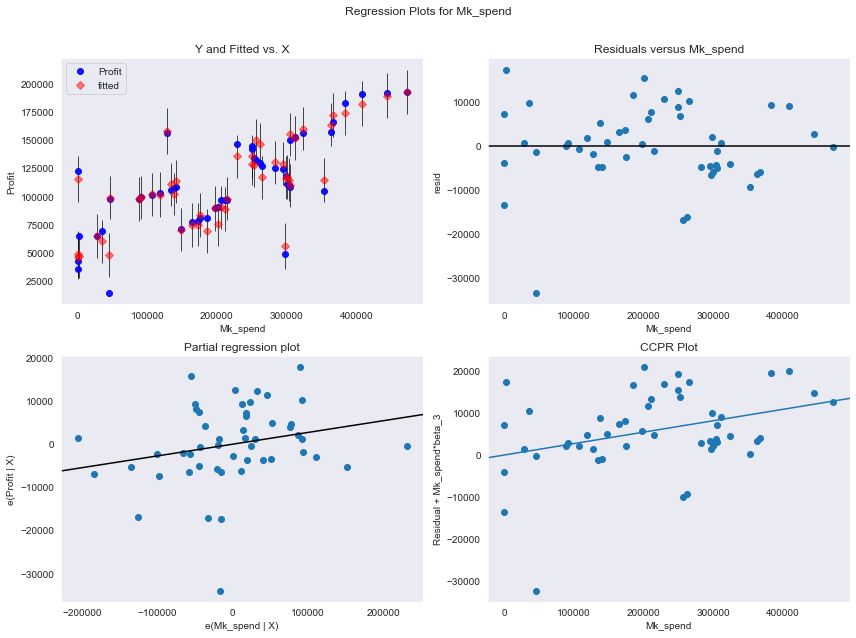

In [38]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'Mk_spend',fig=fig)
plt.show()

In [39]:
(a,_)=model.get_influence().cooks_distance
a

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

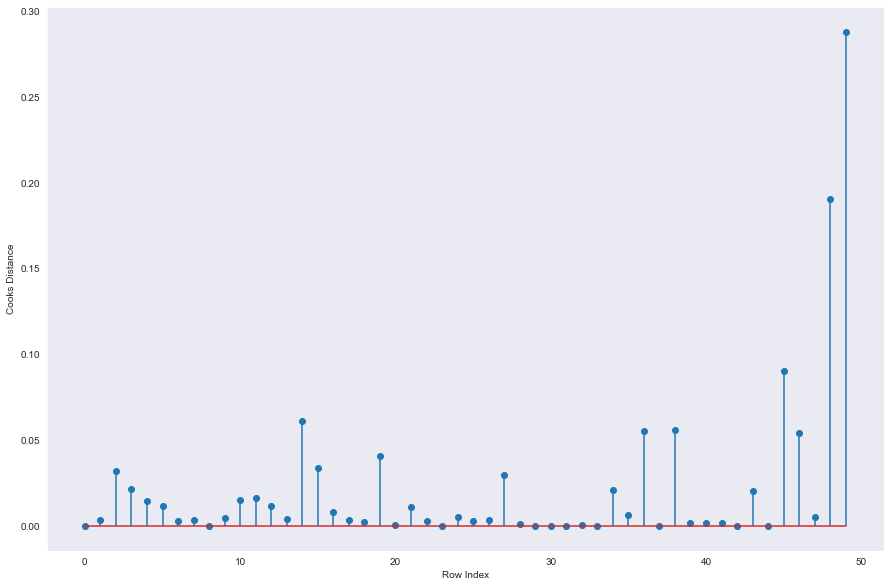

In [40]:
fig=plt.figure(figsize=(15,10))
plt.stem(np.arange(len(data1)),np.round(a,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
np.argmax(a) , np.max(a)

(49, 0.28808229275432634)

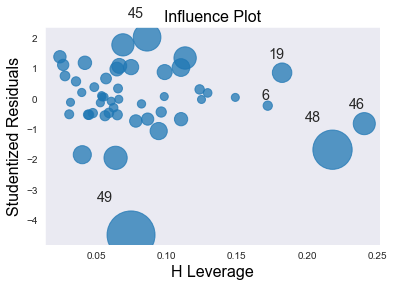

In [42]:
influence_plot(model)
plt.show()

In [43]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [47]:
data1[data1.index.isin([49])] 

,Rd_spend,Adm,Mk_spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [48]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,Rd_spend,Adm,Mk_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [49]:
if np.max(a)>0.5 :
    model=smf.ols("Profit~Rd_spend+Adm+Mk_spend",data=data2).fit()
    (a,_)=model.get_influence().cooks_distance
    a
    np.argmax(a) , np.max(a)
    data2=data2.drop(data2.index[[np.argmax(a)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~Rd_spend+Adm+Mk_spend",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus the model accuracy is improved to",final_model.rsquared)

Thus the model accuracy is improved to 0.9613162435129847


In [50]:
final_model.rsquared 

0.9613162435129847

In [51]:
data2

,Rd_spend,Adm,Mk_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [52]:
new_data=pd.DataFrame({'Rd_spend':75000,"Adm":90000,"Mk_spend":130000},index=[0])
new_data

,Rd_spend,Adm,Mk_spend
0,75000,90000,130000


In [53]:
final_model.predict(new_data)

0    112389.827861
dtype: float64

In [54]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [55]:
d2={'Prep_Model':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Model,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


# Q2. Toyota_Corolla

Question:- Prepare a prediction model for predicting Price.

In [69]:
data3=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
data3

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [71]:
data4=pd.concat([data3.iloc[:,2:4],data3.iloc[:,6:7],data3.iloc[:,8:9],data3.iloc[:,12:14],data3.iloc[:,15:18]],axis=1)
data4

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [72]:
data5=data4.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [73]:
data5[data5.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [74]:
data6=data5.drop_duplicates().reset_index(drop=True)
data6

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [75]:
data6.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [76]:
data6.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


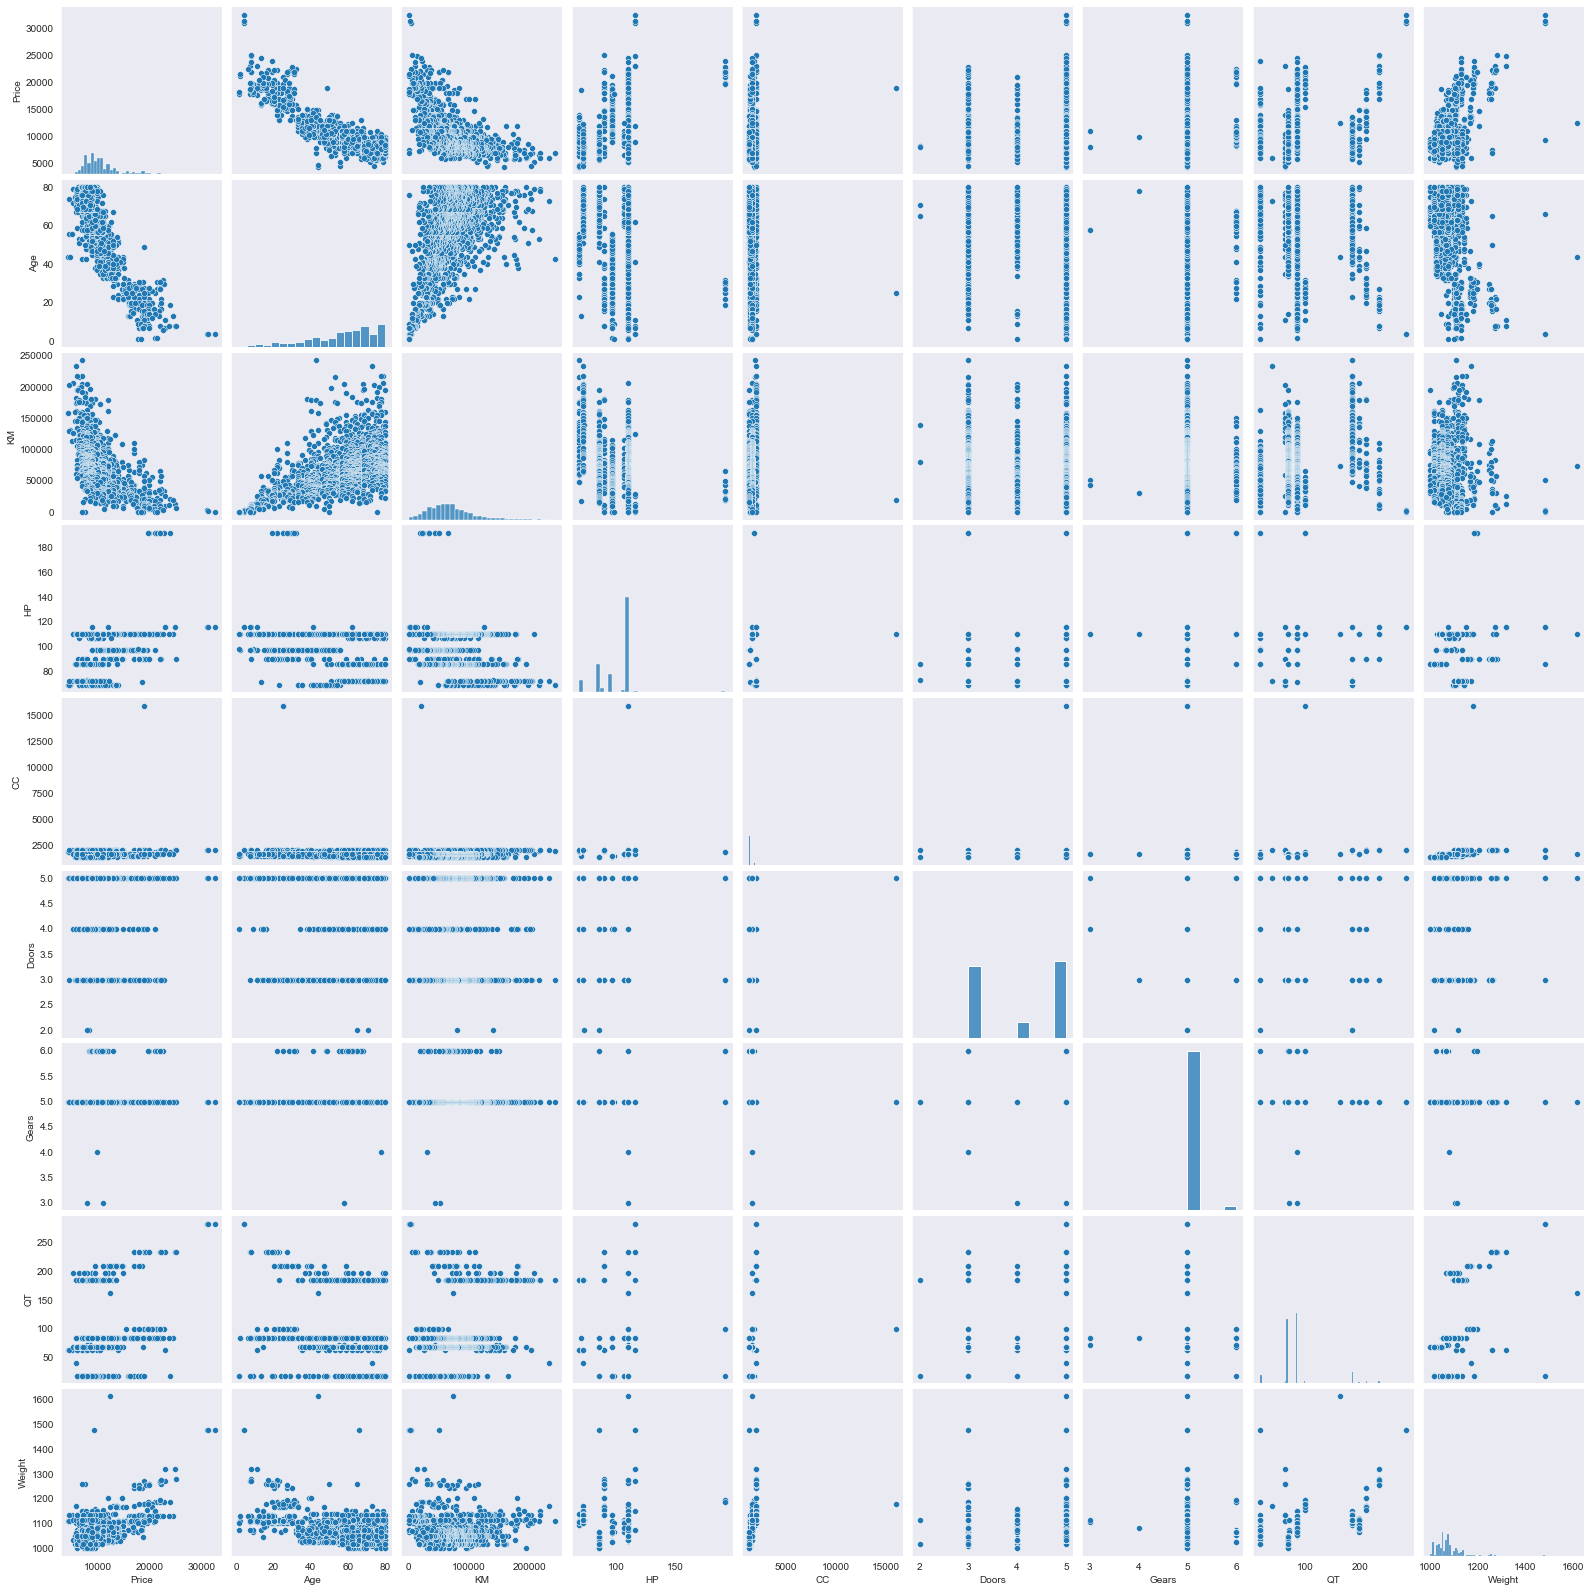

In [77]:
sns.set_style(style='dark')
sns.pairplot(data6)

In [78]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data6).fit()

In [79]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [80]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [81]:
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [82]:
slr_c=smf.ols('Price~CC',data=data6).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [83]:
slr_d=smf.ols('Price~Doors',data=data6).fit()
slr_d.tvalues , slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [84]:
mlr_cd=smf.ols('Price~CC+Doors',data=data6).fit()
mlr_cd.tvalues , mlr_cd.pvalues 

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [86]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=data6).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=data6).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=data6).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=data6).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=data6).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=data6).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=data6).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=data6).fit().rsquared
vif_WT=1/(1-rsq_WT)

d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


C:\Users\lunia\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


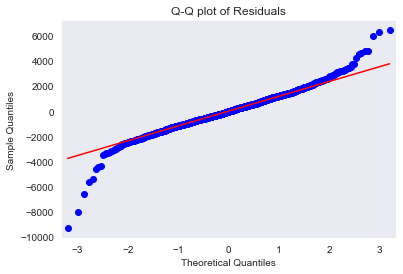

In [87]:
sm.qqplot(model.resid,line='q') 
plt.title("Q-Q plot of Residuals")
plt.show()

In [88]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [89]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [90]:
def standard_values(vals) : return (vals-vals.mean())/vals.std() 

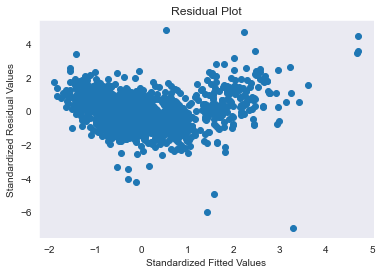

In [92]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

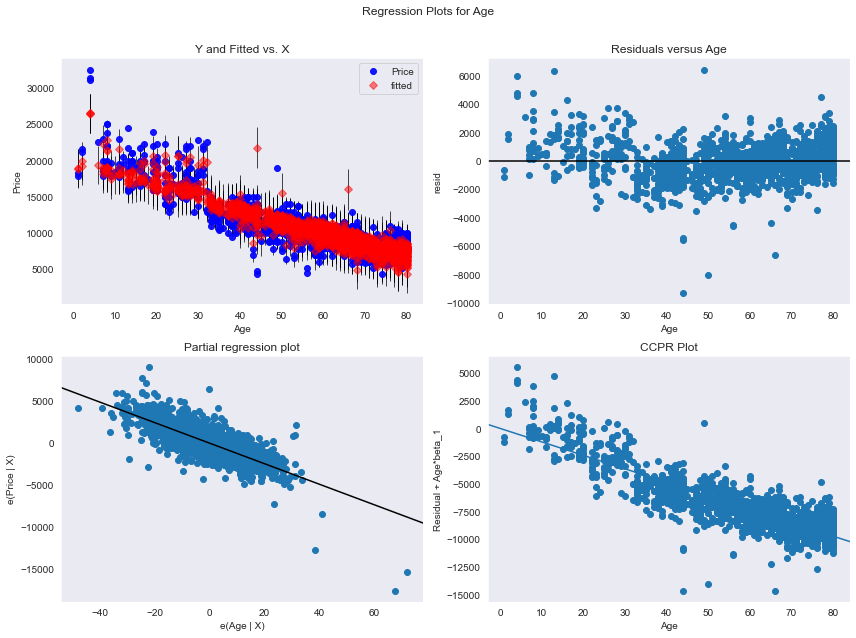

In [93]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

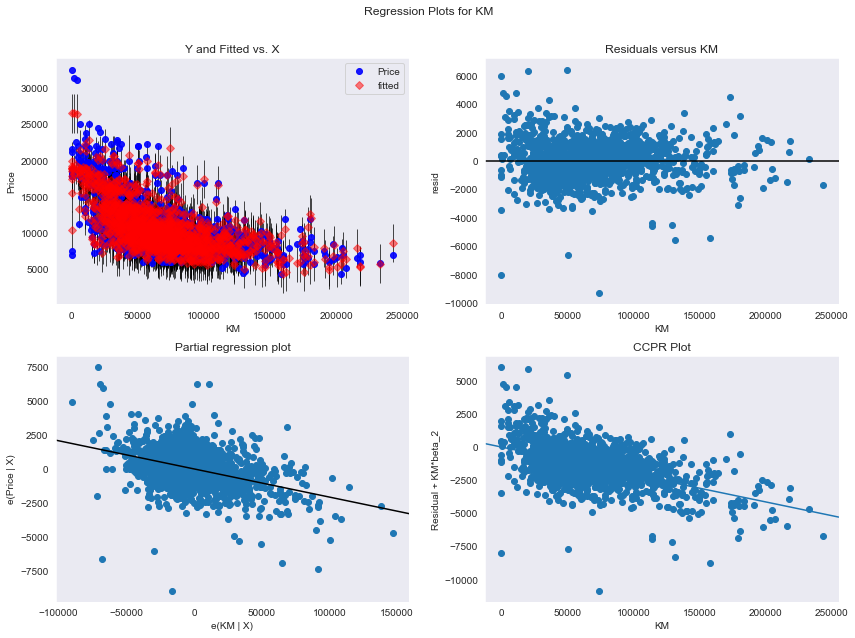

In [94]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

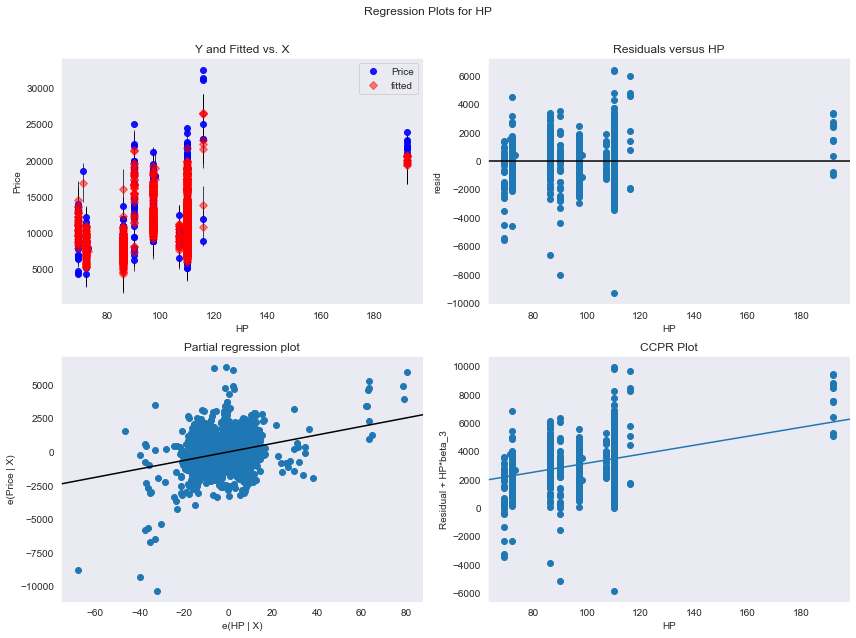

In [95]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

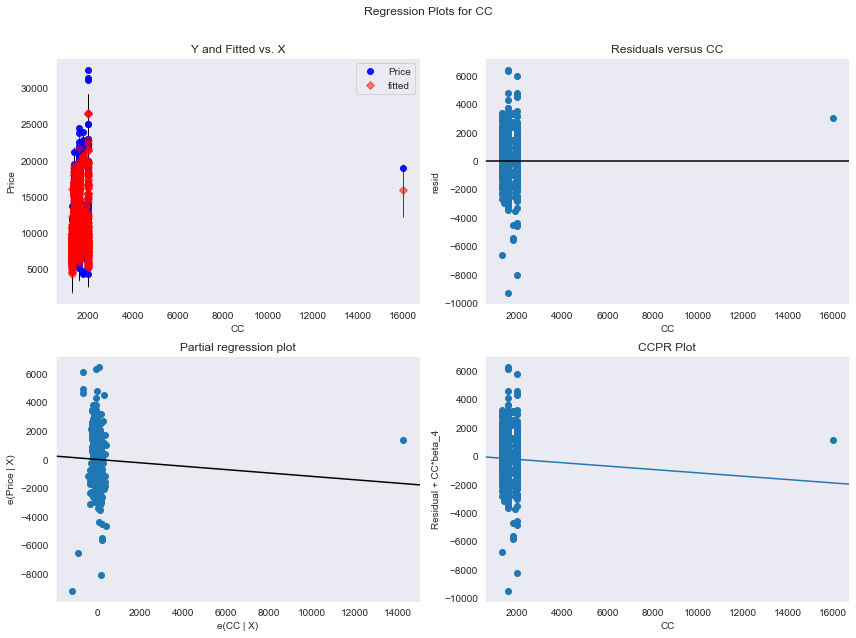

In [96]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

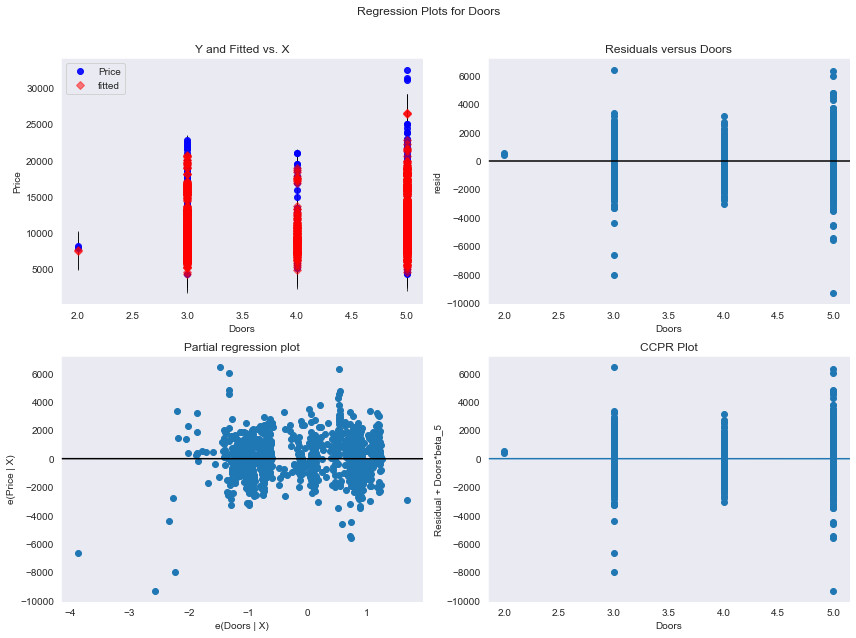

In [97]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

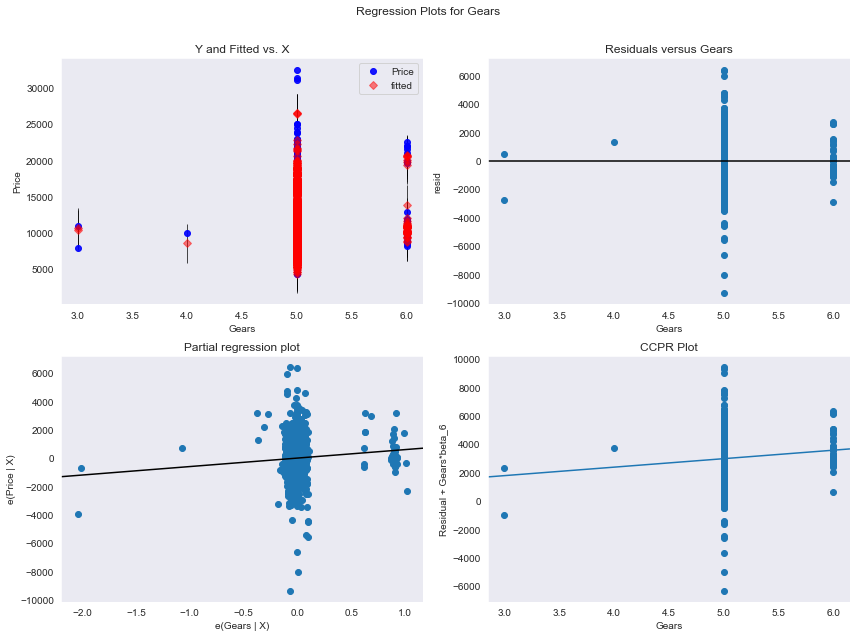

In [98]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

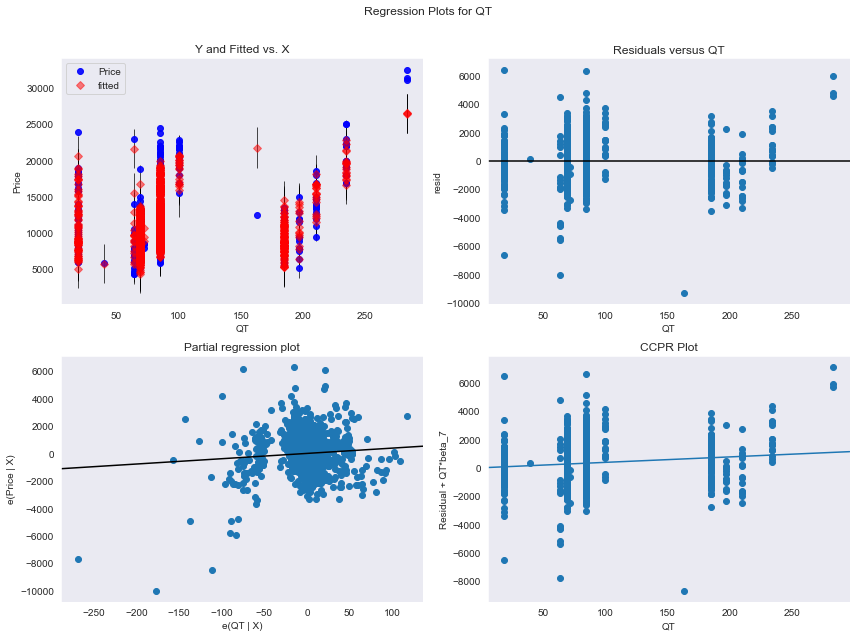

In [99]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

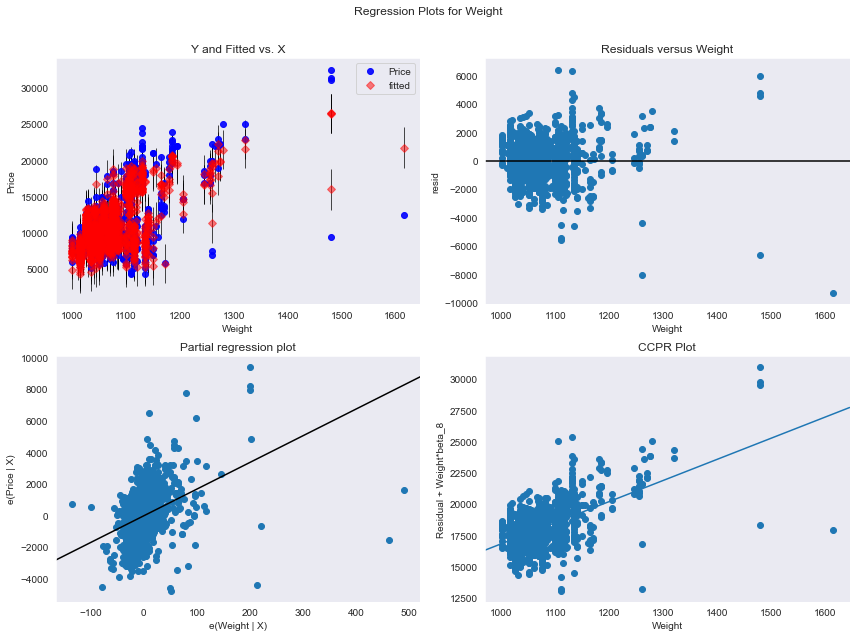

In [100]:
fig=plt.figure(figsize=(12,9))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [101]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

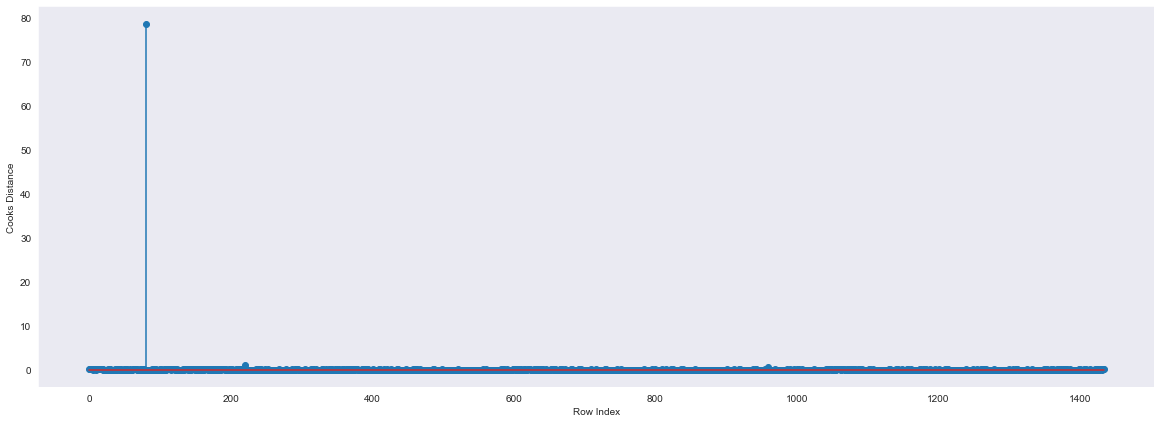

In [103]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data6)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [104]:
np.argmax(c) , np.max(c)

(80, 78.7295058224916)

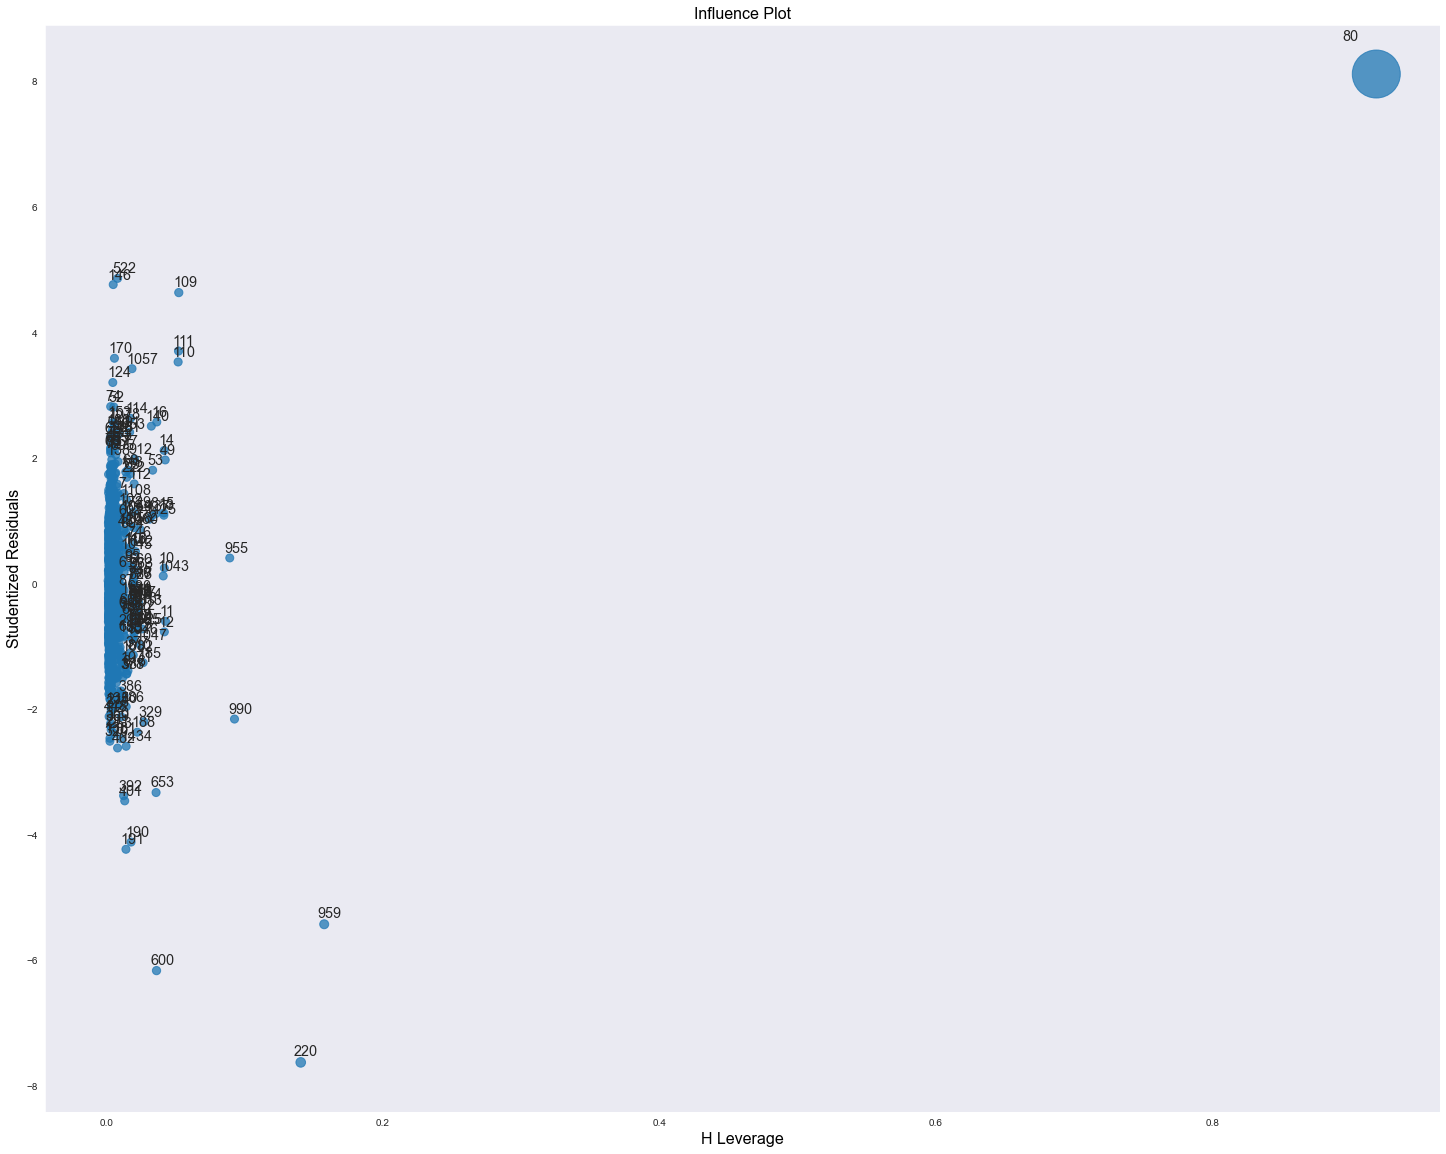

In [107]:
fig,ax=plt.subplots(figsize=(25,20))
fig=influence_plot(model,ax = ax)

In [108]:
k=data6.shape[1]
n=data6.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [109]:
data6[data6.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [110]:
d=data6.copy()
d

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [112]:
d1=d.drop(d.index[[80]],axis=0).reset_index(drop=True)
d1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [113]:
for c in [np.max(c)>0.5]:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=d1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    d1=d1.drop(d1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    d1
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=d1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282


In [114]:
final_model.rsquared

0.8765926307402282

In [115]:
d1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [116]:
new_data=pd.DataFrame({'Age':18,"KM":27000,"HP":60,"CC":1100,"Doors":4,"Gears":5,"QT":58,"Weight":1084},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,18,27000,60,1100,4,5,58,1084


In [117]:
final_model.predict(new_data)

0    15791.29567
dtype: float64

In [119]:
pred_y=final_model.predict(d1)
pred_y

0       16453.715678
1       16006.217709
2       16428.047478
3       16086.340059
4       15908.429428
            ...     
1428     9014.516216
1429     8441.666463
1430     8592.508558
1431     8710.863036
1432    10232.595430
Length: 1433, dtype: float64